In [12]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt 



In [4]:
(train_images, target_images), (test_images, test_target) = keras.datasets.mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


In [8]:
print("train image shape: ", train_images.shape)
print("target image shape: ", target_images.shape)
print("test image shape: ", test_images.shape)
print("test target shape: ", test_target.shape)

train image shape:  (60000, 28, 28)
target image shape:  (60000,)
test image shape:  (10000, 28, 28)
test target shape:  (10000,)


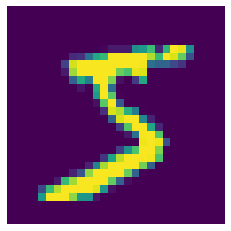

In [20]:
plt.axis(False)
plt.imshow(train_images[0]/255.)
plt.show()

In [31]:
shape = train_images.shape 
train_images = train_images.reshape(shape[0], shape[1], shape[2], 1)
train_images = (train_images-127.5)/127.5

In [32]:
BUFFER_SIZE = 60000
BATCH_SIZE = 256

In [29]:
# Batch and shuffle the data
train_dataset = tf.data.Dataset.from_tensor_slices(train_images).shuffle(BUFFER_SIZE).batch(BATCH_SIZE)

In [30]:
train_dataset

<BatchDataset shapes: (None, 28, 28, 1), types: tf.float32>

In [33]:
import dataLoader

In [35]:
train_dataset = dataLoader.train_dataset

TensorShape([1, 28, 28, 1])

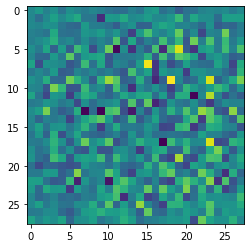

In [46]:
from matplotlib import set_loglevel
import tensorflow as tf 
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense

#create the Generator
def Generator():
    n_nodes = 7*7*256
    model = tf.keras.Sequential() 
    model.add(Dense(n_nodes, input_shape = (100, )))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())
    model.add(layers.Reshape((7,7,256)))
    model.add(layers.Conv2DTranspose(128, (5,5), strides=(1,1), padding='same', use_bias=False))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    model.add(layers.Conv2DTranspose(64, (5,5), strides=(2,2), padding='same', use_bias=False))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    model.add(layers.Conv2DTranspose(1, (5,5), strides=(2,2), padding='same', use_bias=False, activation='tanh'))


    return model

generator = Generator()
noise = tf.random.normal([1, 100])
generated_image = generator(noise)
plt.imshow(generated_image[0])
generated_image.shape

In [65]:
def Discriminator():
    model = keras.Sequential()
    model.add(layers.Conv2D(64, (5,5), strides=(2,2), padding = 'same', input_shape=[28,28,1]))
    model.add(layers.LeakyReLU())
    model.add(layers.Dropout(0.3))

    model.add(layers.Conv2D(128, (5,5), strides=(2,2), padding = 'same'))
    model.add(layers.LeakyReLU())
    model.add(layers.Dropout(0.3))

    model.add(layers.Flatten())
    model.add(layers.Dense(1))

    return model

discriminator = Discriminator()
decision = discriminator(generated_image)
print (decision)
#discriminator.summary()


tf.Tensor([[0.00194349]], shape=(1, 1), dtype=float32)


In [68]:
#define loss and optimizers
cross_entropy = keras.losses.BinaryCrossentropy(from_logits=True)

generator_optimizer = tf.keras.optimizers.Adam(1e-4)
discriminator_optimizer = tf.keras.optimizers.Adam(1e-4)


In [69]:
#Save checkpoints
checkpoint_dir = './training_checkpoints'
checkpoint_prefix = os.path.join(checkpoint_dir, "ckpt")
checkpoint = tf.train.Checkpoint(generator_optimizer=generator_optimizer,
                                 discriminator_optimizer=discriminator_optimizer,
                                 generator=generator,
                                 discriminator=discriminator)